In [2]:
# import dependencies
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from IPython.display import display, Javascript, Image

from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

#Get Python and OpenCV Version

print('OpenCV-Python Lib Version:', cv2.__version__)
print('Python Version:',sys.version)

OpenCV-Python Lib Version: 4.8.0
Python Version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [16]:
#import test image

!wget --no-check-certificate \
    https://raw.githubusercontent.com/celenagu/Toyota-Innovation-Challenge/main/Images/R_some_holes_covered.jpg \
    -O R_some_holes_covered.jpg

--2023-12-28 20:26:08--  https://raw.githubusercontent.com/celenagu/Toyota-Innovation-Challenge/main/Images/R_some_holes_covered.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175918 (172K) [image/jpeg]
Saving to: ‘R_some_holes_covered.jpg’

R_some_holes_covere 100%[===================>] 171.79K  --.-KB/s    in 0.03s   

2023-12-28 20:26:09 (5.54 MB/s) - ‘R_some_holes_covered.jpg’ saved [175918/175918]



# I/O - Read, Show, Write Images

In [ ]:
MainImgBGR = cv2.imread('R_some_holes_covered.jpg',cv2.IMREAD_UNCHANGED)

print('DatatypeClass of Image:',type(MainImgBGR))
print('Shape/Size of RGB Img:', MainImgBGR.shape)

plt.figure(figsize=(20,10))
#Note: matplotlib uses RGB format so had to convert BGR-to-RGB
plt.imshow(cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2RGB))
plt.title('RGB Image',color='c')

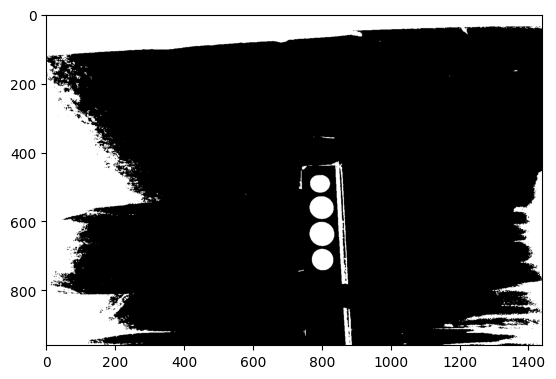

In [ ]:
#Convert to Gray
img_gry = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2GRAY)

#Convert to Binary
# Method: Basic Thresholding
ret,img_bin = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY)
ret,img_bininv = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY_INV)

# Method: Adaptive Thresholding
img_adp_gusbin = cv2.adaptiveThreshold(img_gry,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,5)
img_adp_meanbin = cv2.adaptiveThreshold(img_gry,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,5)

# Method: Otsu's Thresholding
ret,img_Otsubin = cv2.threshold(img_gry,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(img_Otsubin,cmap='binary')

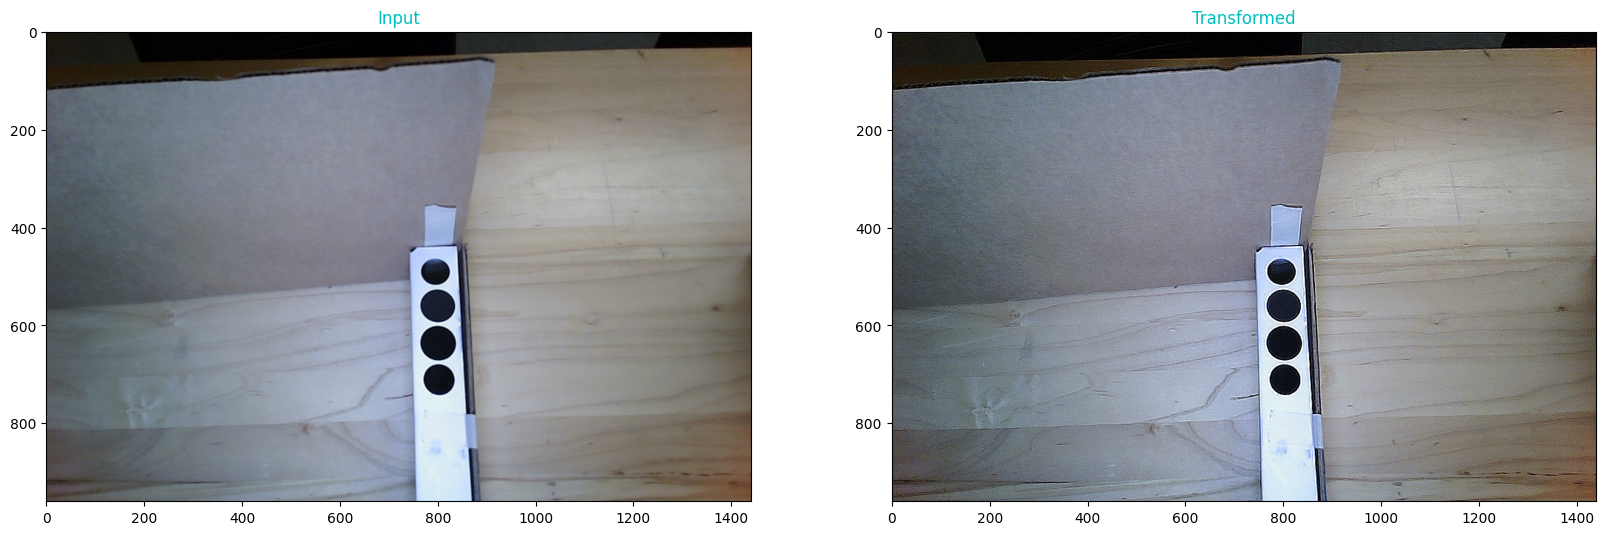

In [ ]:
#Point Detection

path_to_img = 'R_some_holes_covered.jpg'

def pointDetector(path_to_img):
    img = cv2.imread(path_to_img)
    kernel = np.float32([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
    img_out = cv2.filter2D(img,-1,kernel)
    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(cv2.cvtColor(img_out,cv2.COLOR_BGR2RGB)),plt.title('Transformed',color='c')
    plt.show()
    return
pointDetector(path_to_img)

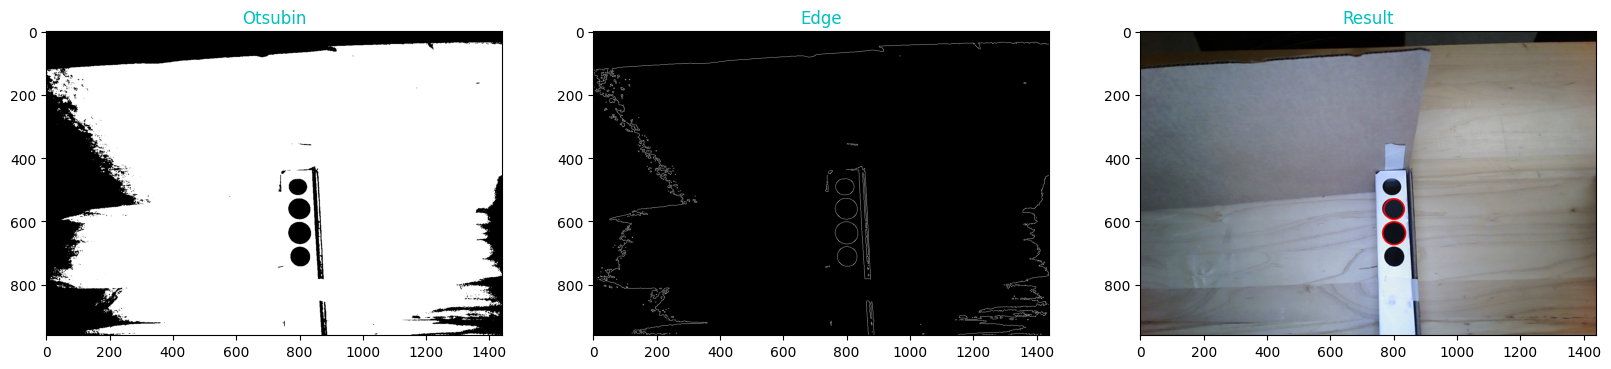

In [9]:
# Line Detection
# DO NOT TOUCH 2.0
# img -> Otsubin -> edge mapping -> circles

path_to_img = 'R_some_holes_covered.jpg'


def houghCircleDetector(path_to_img):
    img = cv2.imread(path_to_img)

    img_gry = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,img_Otsubin = cv2.threshold(img_gry,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    img_blur = cv2.medianBlur(img_Otsubin,3)
    img_edge = cv2.Canny(img_blur,10,150)

    circles = cv2.HoughCircles(img_edge,cv2.HOUGH_GRADIENT,1,minDist=40,param1=200,param2=50, minRadius=5, maxRadius=200)
    circles = np.uint16(np.around(circles))
    for val in circles[0,:]:
        cv2.circle(img,(val[0],val[1]),val[2],(0,0,255),3)

    plt.figure(figsize=(20,10))
    plt.subplot(131),plt.imshow(cv2.cvtColor(img_Otsubin,cv2.COLOR_BGR2RGB)),plt.title('Otsubin',color='c')
    plt.subplot(132),plt.imshow(cv2.cvtColor(img_edge,cv2.COLOR_BGR2RGB)),plt.title('Edge',color='c')
    plt.subplot(133),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.show()
    return

houghCircleDetector(path_to_img)